In [ ]:
pip install yfinance

# Data Collection: 
        Download and create a csv file with historical data 
        from all components (stocks) from bovespa.

        Created by Sergio Novi, sergiolnovi@gmail.com

In [4]:
# Import Usefull libraries

import requests
from lxml import html
import yfinance as yf 
import pandas as pd
import os
import matplotlib.pyplot as plt



Step 1: Web-Scrap the list of all Bovespa components.
We will need this list to download the data with yfinance.


In [5]:
# Get page content from specific url
url = 'https://topforeignstocks.com'
url = url+'/indices/components-of-the-bovespa-index/';
pageContent = requests.get(url);

In [6]:
# Store the contents under tree
tree = html.fromstring(pageContent.content)

# Take the data from the website table 
# ATTENTION: (this may not work if the website layout changes) 
table = tree.xpath('//*[@id="tablepress-2953"]/tbody')

In [8]:
bovespaComponents=[];
for i in range(len(table[0])):
    adress = '//*[@id="tablepress-2953"]/tbody/tr['
    adress = adress + str(i+1) + ']/td[3]/text()';
    
    bovespaComponents.append(tree.xpath(adress)[0]);

With the list of bovespa stocks (saved on bovespaComponents) at hand, we will collect data using the yfnince library. For now, we will get download all data from the maximum possible period per stock, but we will only save the data for the 'Open Value'. As we are going to correlate the stock prices over a long period of time, we do not need to worry with within day oscillations.

In [ ]:
frames=[];
for item in bovespaComponents:   
    frames.append(pd.DataFrame({item: 
        pd.Series(yf.download(item+'.SA',period='max')['Open'])}));

I will now check if there is some stocks with too few time points

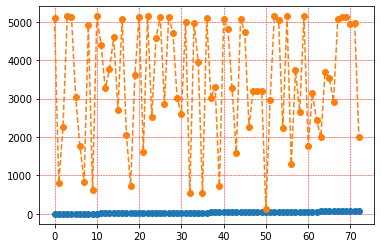

In [34]:
# Checking the number of time points per stock    
NtimePoints=[]
NtimePoints = [(i,len(frames[i])) for i in range(len(frames))]

plt.grid(color='r', linestyle='--', linewidth=.5)
plt.plot(NtimePoints,'--o')  


In [38]:
# I will remove one of the stocks because it has a too short period of time
frames = frames[0:50]+frames[51:]
    

In [39]:
# As I will perform Correlation analysis, I will concatenate the data 
# only for the period that is common for all stoks

data = pd.concat(frames, axis=1, join='inner');

In [46]:
# Save the data in the current folder
path = '/content/drive/My Drive/Pesquisa/Scripts/StockPortfolioGraphTheory'
name = path+'\\HistoricalDataTeste.csv';

data.to_csv(name) 
